# Laboratorio 6 - Análisis de redes sociales
- José Block
- Francisco Rosal
- Gian Luca Rivera

## Librerias

In [4]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS


## Datasets

El dataset de twitter lo obtuvimos por medio del archivo de código de get_data.py en donde, por medio de una cuenta developer obtuvimos los codigos de acceso al api de twitter y poder obtener los tweets relacionado a ciertos hashtags. Extrajimos los tweets que obtuvieran hashtags: #teslabot, #TeslaBot, #Teslabot, #TeslaAI, #TeslaAIBot.

El dataset de instagram se obtuvo por medio de la libreria de python 'instaloader' con la cual, al ser instalada, en la linea de comandos se hace sesión a una cuenta de instagram existente y luego se extraen los comentarios de un post por medio del id de ese post. Esto genera un json con la data de los comentarios de ese post que es el post de lanzamiento del Tesla Bot de Tesla.

In [5]:
tweets = pd.read_excel('tweets.xlsx')
instaComments = pd.read_json('instagram-comments.json')

In [6]:
tweets.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1434311496201236482,RT @TeslaAIBot : Is human extinction inevitabl...,Christia Caroro,CaroroChristia,2021-09-05T00:24:43.000Z,Sun Sep 05 00:24:43 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,5,0,NaN,NaN,NaN,NaN,NaN
1,1434309779636178946,RT @TeslaAIBot : Is human extinction inevitabl...,Michael Spicer (he/him),mycoolspicer,2021-09-05T00:17:54.000Z,Sun Sep 05 00:17:54 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,5,0,NaN,NaN,NaN,NaN,NaN
2,1434307859244802049,RT @TeslaAIBot : Is human extinction inevitabl...,Optimus ,TeslaAIBot,2021-09-05T00:10:16.000Z,Sun Sep 05 00:10:16 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,5,0,NaN,NaN,NaN,NaN,NaN
3,1434302910691782657,Working my ass off on this Labor Day weekend s...,MOAR_HODL,MoarHodl,2021-09-04T23:50:36.000Z,Sat Sep 04 23:50:36 +0000 2021,1,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,NaN,2,0,NaN,NaN,NaN,NaN,NaN
4,1434301867790585857,RT @TeslaBotties : FIRST 500 Discord member ge...,Souhate,xouhater,2021-09-04T23:46:27.000Z,Sat Sep 04 23:46:27 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,https://discord.gg/uhVHWeGVMU,8,0,photo,https://pbs.twimg.com/media/E-en7feXoAMWwqq.jpg,NaN,NaN,NaN


In [7]:
instaComments.head()

,id,created_at,text,owner,likes_count,answers
0,17884581686361219,2021-09-05 22:20:11,This can’t end well,"{'id': '26991106797', 'is_verified': False, 'p...",0,[]
1,17914451887979639,2021-09-05 22:18:51,credo,"{'id': '48525992026', 'is_verified': False, 'p...",0,[]
2,18247939630040060,2021-09-05 22:18:41,Nahhhh this is the end bye y’all,"{'id': '7042650650', 'is_verified': False, 'pr...",0,[]
3,17986587886388599,2021-09-05 22:17:12,The beginning of the end,"{'id': '45683931428', 'is_verified': False, 'p...",0,[]
4,18101257114266449,2021-09-05 22:15:30,#bantesla,"{'id': '41570330084', 'is_verified': False, 'p...",0,[]


## Limpieza

In [8]:
def clean_data(text):
    stopW = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'http[s]?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'[^A-Za-z ]+', '', text)
    def remove_stopwords(text):
        textoken = word_tokenize(text)
        text = [word for word in textoken if word not in stopW]
        return " ".join(text)
    text1 = remove_stopwords(text)
    text = " ".join(text1.split())
    
    return text

In [12]:
instaComments['text'] = instaComments['text'].apply(clean_data)
instaComments.head()

,id,created_at,text,owner,likes_count,answers
0,17884581686361219,2021-09-05 22:20:11,cant end well,"{'id': '26991106797', 'is_verified': False, 'p...",0,[]
1,17914451887979639,2021-09-05 22:18:51,credo,"{'id': '48525992026', 'is_verified': False, 'p...",0,[]
2,18247939630040060,2021-09-05 22:18:41,nahhhh end bye yall,"{'id': '7042650650', 'is_verified': False, 'pr...",0,[]
3,17986587886388599,2021-09-05 22:17:12,beginning end,"{'id': '45683931428', 'is_verified': False, 'p...",0,[]
4,18101257114266449,2021-09-05 22:15:30,bantesla,"{'id': '41570330084', 'is_verified': False, 'p...",0,[]


## Exploracion de datos

In [14]:
d = instaComments.sort_values('likes_count', ascending=False)
d = d[d['text'] != ""]
d = d[['text', 'likes_count']][:10]
d

,text,likes_count
14931,want terminator thats get terminator,10884
14864,elon make apocalypse look cool,10170
14925,dont like,9065
14829,well life fun lasted,8454
14769,begins ladies gentlemen honor,6110
15120,black ops,5837
14861,definitely mistake humanity look back soon,4717
14670,part die right,4103
15121,reasons tesla shares,3709
14937,scary shit,2244


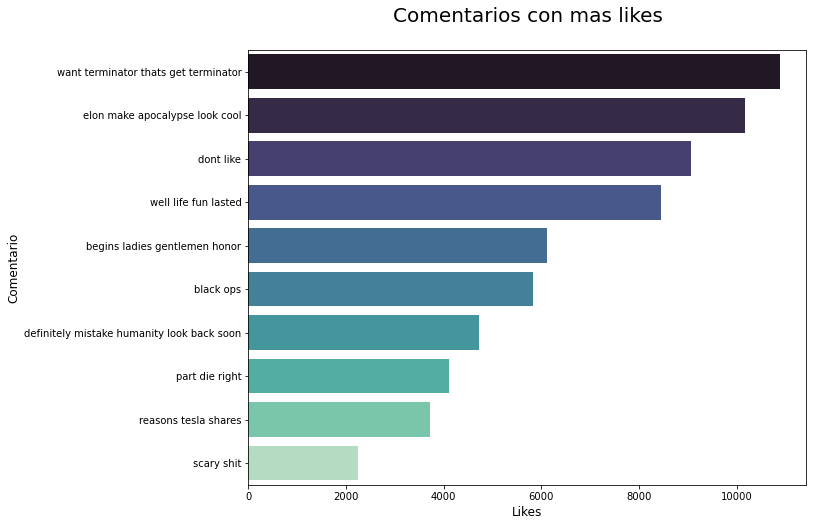

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x=d['likes_count'].tolist(), y=d['text'].tolist(), orient='h', palette='mako')
plt.title('Comentarios con mas likes\n', fontsize=20)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Comentario', fontsize=12)
plt.show()

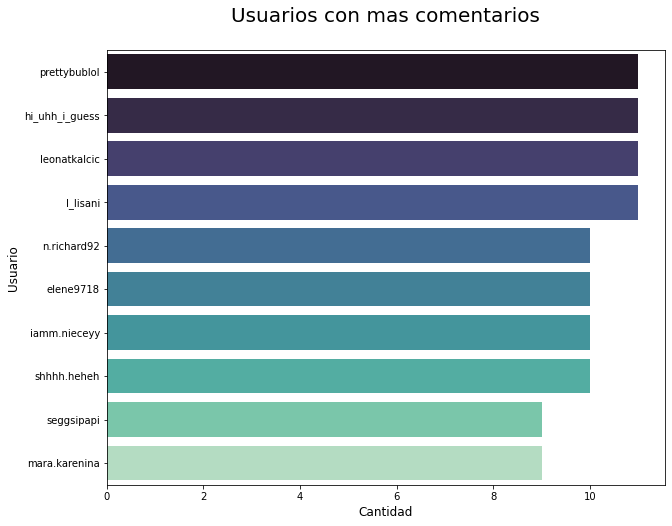

In [16]:
r = pd.json_normalize(instaComments['owner'])
plt.figure(figsize=(10, 8))
username = r['username'].value_counts().nlargest(10)
sns.barplot(x=username.tolist(), y=username.index, orient='h', palette='mako')
plt.title('Usuarios con mas comentarios\n', fontsize=20)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Usuario', fontsize=12)
plt.show()

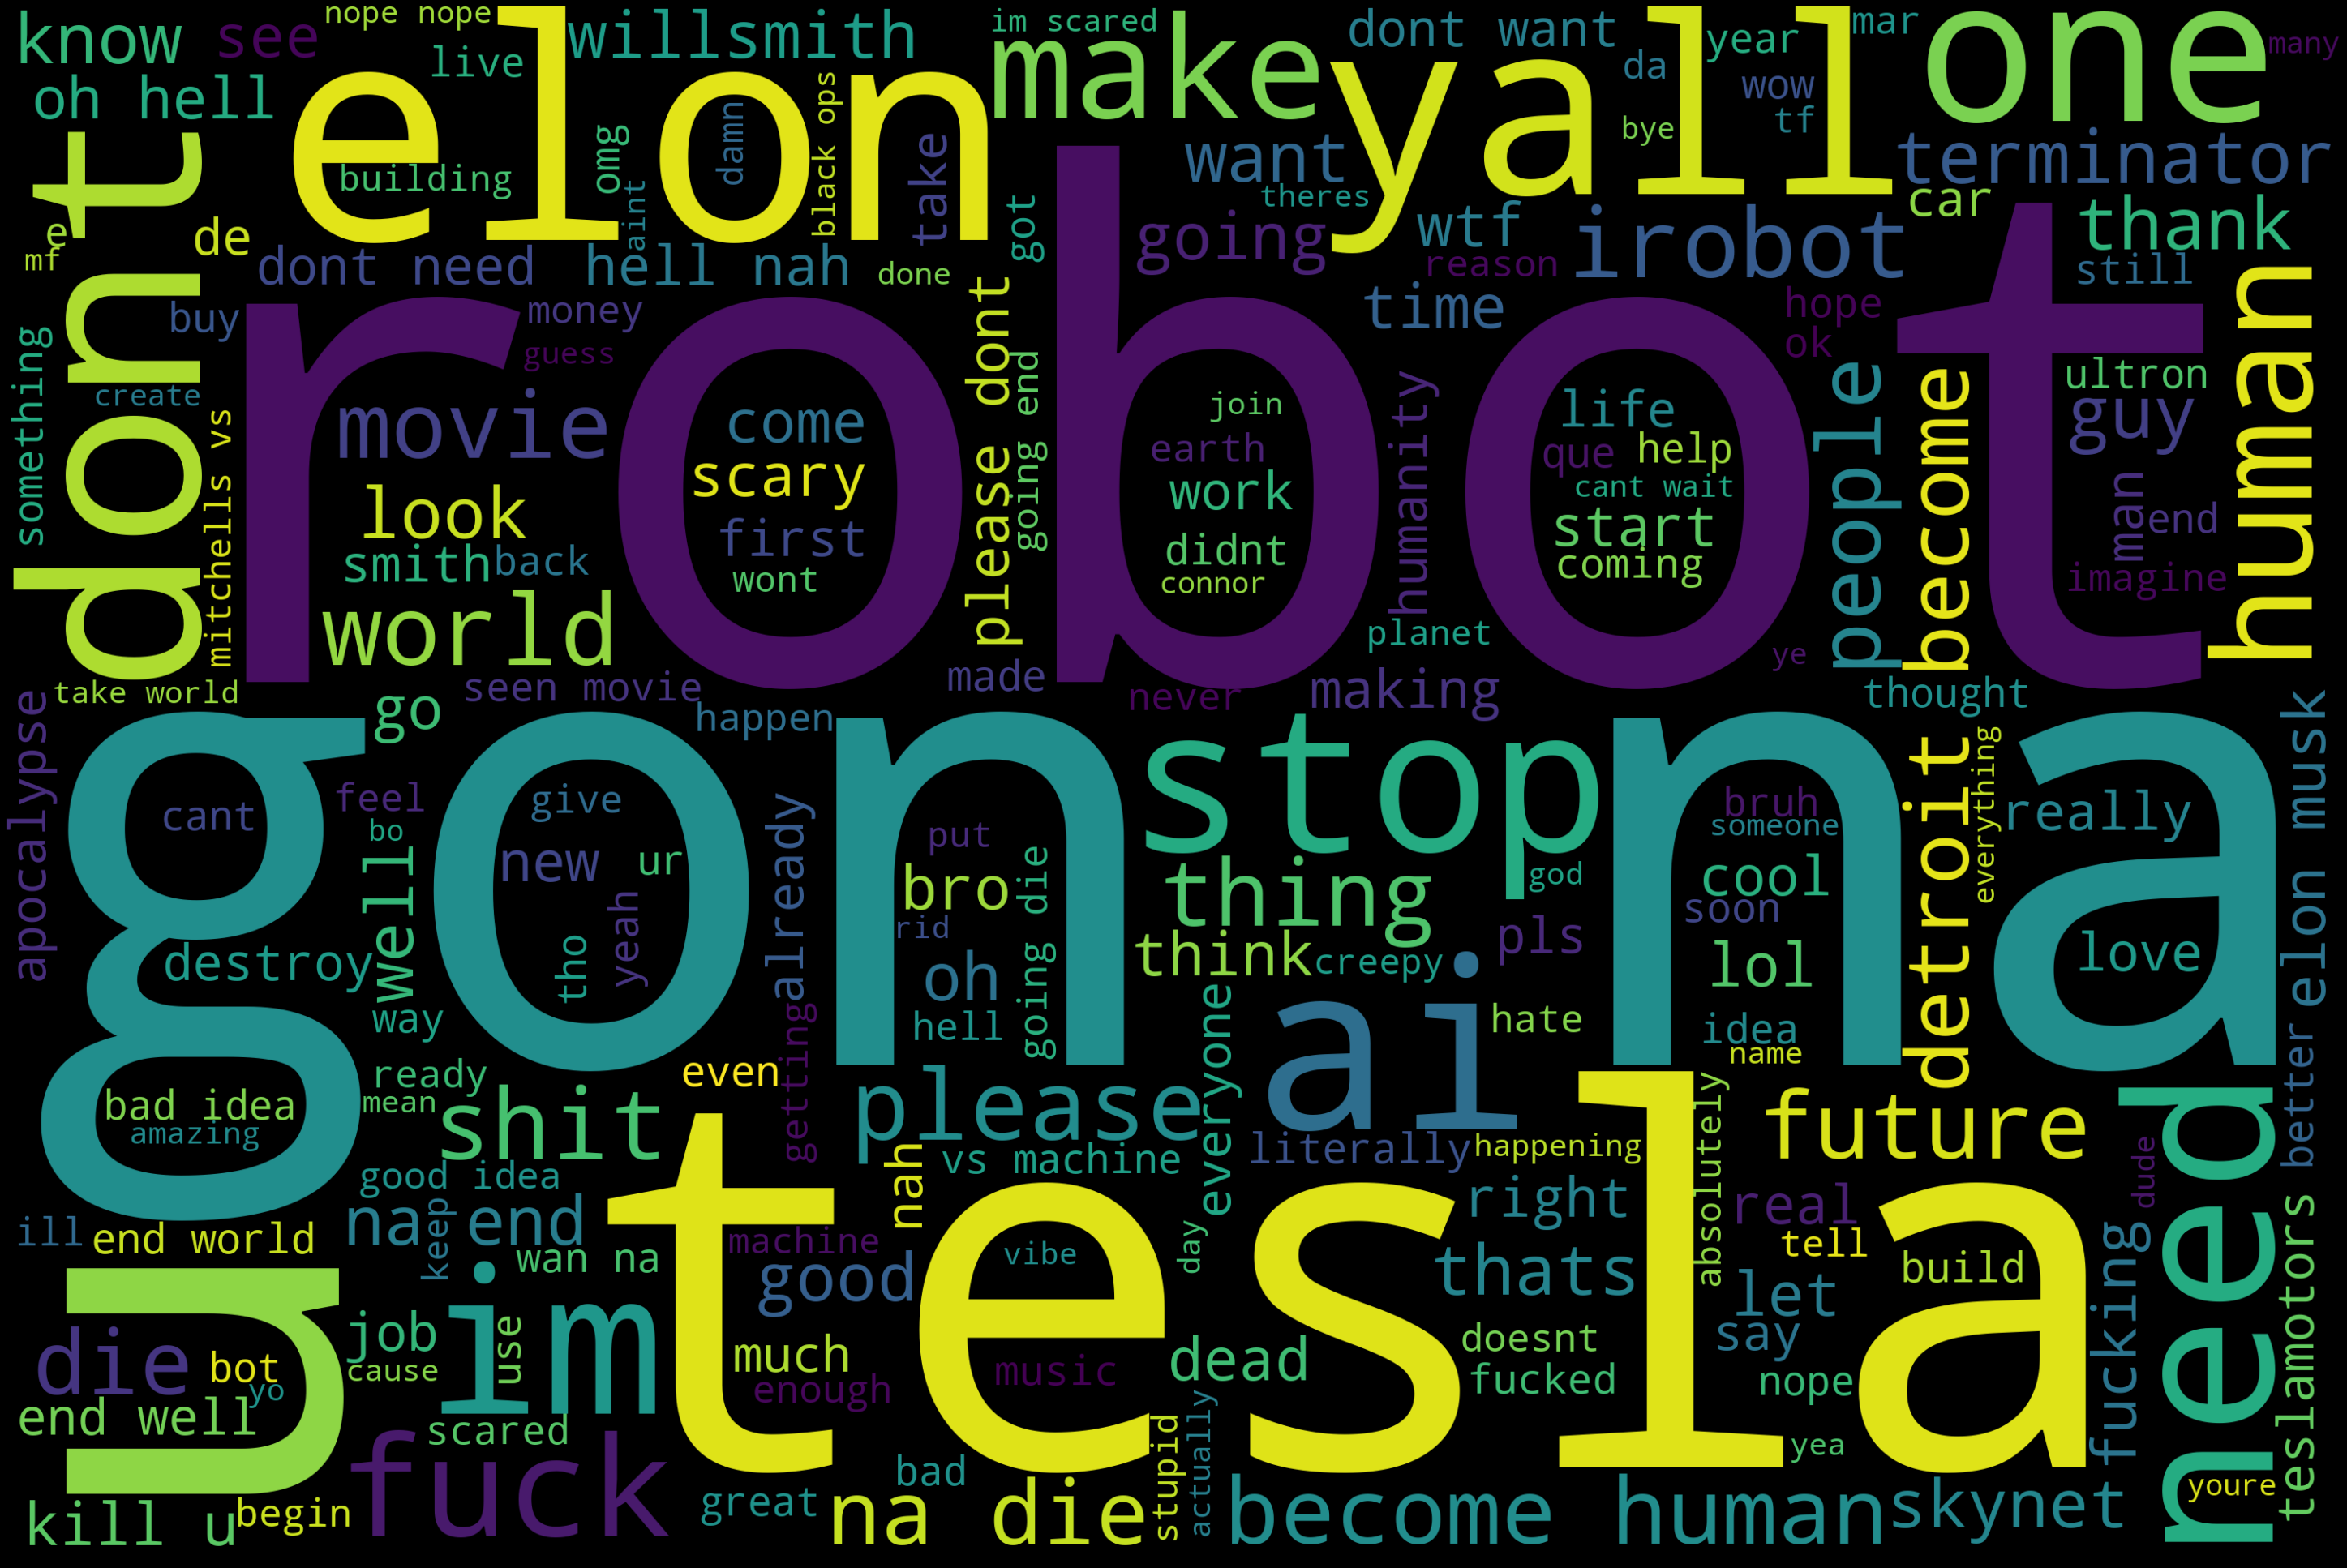

In [17]:
comments = instaComments['text'].str.split(' ')
comments_text = [" ".join(tweet) for tweet in comments]
all_texts = " ".join(comments_text)

wordcloud_text = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS
).generate(all_texts)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
h = r.loc[r['is_verified']==True]['username']
k = instaComments.loc[r['is_verified']==True]['text']
a = pd.DataFrame({"Verified User": h, "Comment": k})

a = a[a['Comment'] != ""]
d = a[['Verified User', 'Comment']][:10]
d[:10]

,Verified User,Comment
5335,lethalshooter,future
5462,paulhart,need fpinsoles
6390,kilprity,whatever vaccinated
6434,diegovaloficial,hell noooo
6822,avatradeofficial,popular stock traders
7365,felly,im
7517,adamfreeland,need talk soundtrack
7589,omarsamra,good boys
7980,chucklesgarage,im calling smith
8354,cre8tivegod,robot surrogates type stuff
